# Trabalhando com Dados Reais

Nesse notebook, iremos realizar o processo de limpeza e tratamento de dados de estações meteorológicas do INMET (Instituro Nacional de Meteorologia).

Inicialmente, teremos que separar nossos dados em DataFrames referentes a cada cidade contemplada.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exercício - 1
Crie DataFrames para cada cidade presente nos dados da pasta `data/INMET`.

In [3]:
df_votuporanga = pd.read_csv('data/INMET/dados_83623_D_2019-01-01_2021-07-24.csv',sep=';',skiprows=10,decimal=',')
df_franca = pd.read_csv('data/INMET/dados_83630_D_2019-01-01_2023-09-08.csv',sep=';',skiprows=10,decimal=',')
df_sao_simao = pd.read_csv('data/INMET/dados_83669_D_2019-01-01_2023-09-08.csv',sep=';',skiprows=10,decimal=',')
df_catanduva = pd.read_csv('data/INMET/dados_83676_D_2019-01-01_2021-07-24.csv',sep=';',skiprows=10,decimal=',')
df_sao_carlos = pd.read_csv('data/INMET/dados_83726_D_2019-01-01_2023-09-08.csv',sep=';',skiprows=10,decimal=',')
df_sao_paulo = pd.read_csv('data/INMET/dados_83781_D_2019-01-01_2023-09-08.csv',sep=';',skiprows=10,decimal=',')
df_sorocaba = pd.read_csv('data/INMET/dados_83851_D_2019-01-01_2023-09-08.csv',sep=';',skiprows=10,decimal=',')

### IMPORTANTE

Antes de prosseguir, é essencial garantir que os seus DataFrames foram criados corretamente. Verifique os parâmetros `sep` e `skiprows` da documentação do pandas.

In [4]:
df_sao_paulo.head()

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,4.2,NaN,0.0,31.8,24.48,18.7,79.25,65.0,2.300000,NaN
1,2019-01-02,3.7,NaN,6.7,32.0,25.86,21.0,71.75,52.0,2.566667,NaN
2,2019-01-03,6.3,NaN,0.0,33.3,24.86,20.6,69.75,43.0,3.066667,NaN
3,2019-01-04,6.5,NaN,37.8,29.4,23.92,20.7,86.75,73.0,1.266667,NaN
4,2019-01-05,2.0,NaN,25.6,24.7,22.40,20.3,83.75,78.0,1.633333,NaN


Como evidente, para todos os DataFrames, a única coluna não nula é a da `Data de Medição`, portanto, iremos começar por ela.

# Utilizando DateTime

DateTime é uma classe do Python que transforma um data (string) em um objeto com propriedades a mais. Uma dessas propriedades é a possibilidade de comparação booleana. Um objeto Datetime pode ser comparado com outro, e o resultado nos trás um valor booleano. 

Um exemplo disso seria o problema abaixo:

**Exercício** - $N$

        Crie um DataFrame com apenas medições que foram feitas em 2021.

Para completar o exercício acima, podemos criar um filtro que checa se o ano da data é 2021. Isso é uma das possíveis vantagens do DateTime.

## Exercício - 2
Passe todas as colunas de data para objetos DateTime. Veja documentação do Pandas, ou pesquise outros métodos. 

In [5]:
df_votuporanga['Data Medicao'] = pd.to_datetime(df_votuporanga['Data Medicao'], format="%Y-%m-%d")
df_votuporanga

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,2.7,NaN,49.0,33.6,25.84,15.8,NaN,90.0,NaN,NaN
1,2019-01-02,3.8,NaN,6.2,34.2,26.68,19.4,NaN,90.0,NaN,NaN
2,2019-01-03,4.2,NaN,5.4,34.8,27.60,19.4,NaN,78.0,NaN,NaN
3,2019-01-04,5.2,NaN,0.0,32.6,26.00,19.8,NaN,86.0,NaN,NaN
4,2019-01-05,7.6,NaN,0.0,30.2,23.72,17.6,NaN,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931,2021-07-20,NaN,NaN,0.0,26.4,15.56,9.6,NaN,60.0,NaN,NaN
932,2021-07-21,NaN,NaN,0.0,30.8,19.58,13.6,NaN,60.0,NaN,NaN
933,2021-07-22,NaN,NaN,0.0,32.6,22.84,13.6,NaN,64.0,NaN,NaN
934,2021-07-23,NaN,NaN,0.0,30.8,21.46,15.6,NaN,54.0,NaN,NaN


In [6]:
df_franca['Data Medicao'] = pd.to_datetime(df_franca['Data Medicao'], format="%Y-%m-%d")
df_franca

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,2.6,2.7,2.8,28.0,22.36,19.6,81.50,64.0,2.000000,NaN
1,2019-01-02,2.3,3.8,15.0,30.1,24.36,20.3,69.50,57.0,3.333333,NaN
2,2019-01-03,4.1,1.1,0.0,29.4,24.56,22.0,69.75,57.0,2.333333,NaN
3,2019-01-04,2.5,0.0,0.7,25.2,21.48,19.6,87.25,78.0,2.666667,NaN
4,2019-01-05,0.5,0.0,12.6,23.0,20.64,18.6,91.50,85.0,2.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-09-04,NaN,7.4,1.0,33.0,27.00,21.2,50.50,NaN,4.115520,NaN
1708,2023-09-05,NaN,1.0,8.8,27.4,21.74,18.9,87.75,NaN,3.429600,NaN
1709,2023-09-06,NaN,8.0,1.6,29.2,22.96,18.4,65.50,NaN,4.458480,NaN
1710,2023-09-07,NaN,10.5,0.0,28.0,21.80,16.2,48.00,33.0,4.458480,NaN


In [7]:
df_sao_simao['Data Medicao'] = pd.to_datetime(df_sao_simao['Data Medicao'], format="%Y-%m-%d")
df_sao_simao

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,4.6,5.0,0.0,32.1,24.44,17.1,85.75,67.0,0.666667,NaN
1,2019-01-02,1.7,9.0,7.0,33.8,25.74,16.4,68.75,52.0,0.000000,NaN
2,2019-01-03,4.4,4.3,0.0,32.5,24.42,17.2,82.50,65.0,0.666667,NaN
3,2019-01-04,1.8,0.6,28.0,28.1,22.32,16.3,88.00,78.0,1.000000,NaN
4,2019-01-05,0.5,0.0,11.0,26.2,21.72,15.9,90.50,81.0,0.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-09-04,NaN,NaN,0.0,35.0,NaN,NaN,NaN,NaN,0.000000,NaN
1708,2023-09-05,NaN,2.6,2.4,29.7,23.90,21.4,NaN,NaN,0.000000,NaN
1709,2023-09-06,NaN,8.5,0.6,30.0,22.06,17.6,NaN,NaN,1.028880,NaN
1710,2023-09-07,NaN,9.5,0.0,29.6,24.06,19.3,NaN,61.0,1.028880,NaN


In [8]:
df_catanduva['Data Medicao'] = pd.to_datetime(df_catanduva['Data Medicao'], format="%Y-%m-%d")
df_catanduva

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,5.0,8.2,11.6,29.3,25.28,22.3,NaN,77.0,2.0,NaN
1,2019-01-02,5.5,8.8,0.0,31.2,27.18,22.5,NaN,76.0,1.5,NaN
2,2019-01-03,8.2,5.5,0.0,31.6,26.12,23.3,NaN,73.0,2.5,NaN
3,2019-01-04,5.1,0.3,10.2,27.0,23.96,21.6,NaN,86.0,1.5,NaN
4,2019-01-05,4.1,0.0,20.2,26.4,22.88,21.0,NaN,89.0,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931,2021-07-20,6.9,7.7,0.0,25.5,14.72,5.3,NaN,36.0,1.5,NaN
932,2021-07-21,7.6,8.1,0.0,31.0,18.30,7.8,NaN,41.0,1.5,NaN
933,2021-07-22,10.0,8.1,0.0,31.8,20.86,12.5,NaN,40.0,1.5,NaN
934,2021-07-23,9.8,8.6,0.0,29.2,21.36,14.7,NaN,47.0,2.5,NaN


In [9]:
df_sao_carlos['Data Medicao'] = pd.to_datetime(df_sao_carlos['Data Medicao'], format="%Y-%m-%d")
df_sao_carlos

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,4.9,4.7,0.0,30.7,23.36,20.2,NaN,58.0,3.00000,NaN
1,2019-01-02,2.1,7.8,32.2,30.5,25.06,20.3,NaN,75.0,1.00000,NaN
2,2019-01-03,2.8,4.3,0.0,30.0,24.58,21.6,NaN,74.0,1.00000,NaN
3,2019-01-04,2.2,0.7,14.9,27.6,22.86,20.3,NaN,88.0,0.50000,NaN
4,2019-01-05,0.9,0.0,26.2,22.8,20.92,19.3,NaN,95.0,1.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-09-04,NaN,NaN,0.0,32.1,NaN,NaN,NaN,NaN,2.05776,NaN
1708,2023-09-05,NaN,4.3,3.5,28.9,22.38,19.7,NaN,NaN,3.08664,NaN
1709,2023-09-06,NaN,7.3,NaN,26.2,NaN,NaN,NaN,NaN,5.14440,NaN
1710,2023-09-07,NaN,NaN,0.0,NaN,NaN,15.3,NaN,80.0,7.20216,NaN


In [10]:
df_sao_paulo['Data Medicao'] = pd.to_datetime(df_sao_paulo['Data Medicao'], format="%Y-%m-%d")
df_sao_paulo

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,4.2,NaN,0.0,31.8,24.48,18.7,79.25,65.0,2.300000,NaN
1,2019-01-02,3.7,NaN,6.7,32.0,25.86,21.0,71.75,52.0,2.566667,NaN
2,2019-01-03,6.3,NaN,0.0,33.3,24.86,20.6,69.75,43.0,3.066667,NaN
3,2019-01-04,6.5,NaN,37.8,29.4,23.92,20.7,86.75,73.0,1.266667,NaN
4,2019-01-05,2.0,NaN,25.6,24.7,22.40,20.3,83.75,78.0,1.633333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-09-04,NaN,7.2,0.0,31.7,27.10,21.3,56.50,NaN,1.028880,NaN
1708,2023-09-05,NaN,0.7,0.0,27.8,21.28,21.6,83.00,NaN,1.886280,NaN
1709,2023-09-06,NaN,0.1,0.0,20.1,17.46,16.2,81.75,NaN,1.543320,NaN
1710,2023-09-07,NaN,6.9,0.0,27.1,NaN,NaN,77.00,54.0,1.028880,NaN


In [11]:
df_sorocaba['Data Medicao'] = pd.to_datetime(df_sorocaba['Data Medicao'], format="%Y-%m-%d")
df_sorocaba

,Data Medicao,"EVAPORACAO DO PICHE, DIARIA(mm)","INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)",Unnamed: 10
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1707,2023-09-04,NaN,6.5,0.5,32.4,25.70,19.3,70.50,NaN,0.51444,NaN
1708,2023-09-05,NaN,2.4,3.6,28.6,22.24,21.0,76.75,NaN,0.68592,NaN
1709,2023-09-06,NaN,3.9,0.0,24.0,19.32,17.2,73.25,NaN,1.88628,NaN
1710,2023-09-07,NaN,8.0,0.0,30.4,22.02,17.1,67.50,51.0,0.68592,NaN


## Exercício - 3
Faça um gráfico que mostre a temperatura máxima em cada dia de março de 2020 para os municípios de São Paulo, São Carlos e Sorocaba.

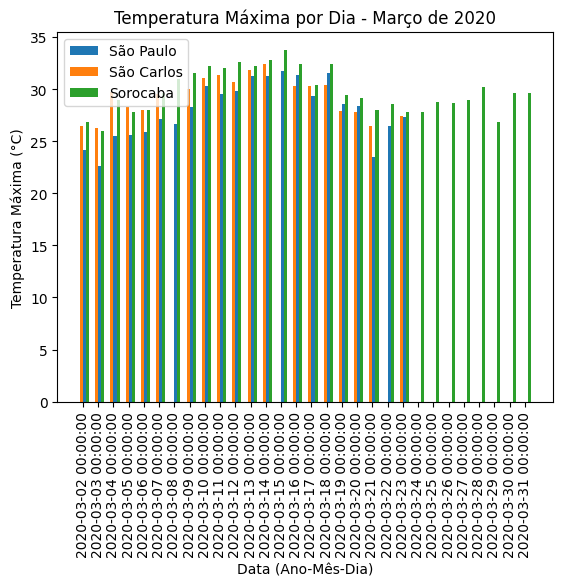

In [12]:
import matplotlib.pyplot as plt


inicio = '2020-3-1'

fim = '2020-3-31'


filtro_sao_carlos = (df_sao_carlos['Data Medicao']>inicio) & (df_sao_carlos['Data Medicao']<=fim)
df_sao_carlos_filtrado = df_sao_carlos[filtro_sao_carlos]

filtro_sao_paulo = (df_sao_paulo['Data Medicao']>inicio) & (df_sao_paulo['Data Medicao']<=fim)
df_sao_paulo_filtrado = df_sao_paulo[filtro_sao_paulo]

filtro_sorocaba = (df_sorocaba['Data Medicao']>inicio) & (df_sorocaba['Data Medicao']<=fim)
df_sorocaba_filtrado = df_sorocaba[filtro_sorocaba]

x = np.arange(len(df_sao_paulo_filtrado['Data Medicao']))

plt.bar(x,df_sao_paulo_filtrado['TEMPERATURA MAXIMA, DIARIA(°C)'], label='São Paulo',align='edge',width=0.2)
plt.bar(x-0.2,df_sao_carlos_filtrado['TEMPERATURA MAXIMA, DIARIA(°C)'], label='São Carlos',align='edge',width=0.2)
plt.bar(x+0.2,df_sorocaba_filtrado['TEMPERATURA MAXIMA, DIARIA(°C)'], label='Sorocaba',align='edge',width=0.2)
plt.xlabel('Data (Ano-Mês-Dia)')
plt.xticks(x,df_sao_paulo_filtrado['Data Medicao'],rotation=90)
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima por Dia - Março de 2020')
plt.legend()
plt.show()


### Preste Atenção
Há valores nulos. O que fazer com essa informação?

Bom, depende muito da situação. Vamos explorar dois caminhos.

## Exerício - 4
Veja, para cada coluna dos seus DataFrames originais, quantos valores estão nulos, ou se há valores nulos.

In [13]:
df_votuporanga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              936 non-null    datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           255 non-null    float64       
 2   INSOLACAO TOTAL, DIARIO(h)                3 non-null      float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            798 non-null    float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            793 non-null    float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  783 non-null    float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            792 non-null    float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   94 non-null     float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  883 non-null    float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA(m

In [14]:
df_franca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              1712 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           1671 non-null   float64       
 2   INSOLACAO TOTAL, DIARIO(h)                1710 non-null   float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            1712 non-null   float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            1709 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  1708 non-null   float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            1711 non-null   float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   1708 non-null   float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  1614 non-null   float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA

In [15]:
df_sao_simao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              1712 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           1493 non-null   float64       
 2   INSOLACAO TOTAL, DIARIO(h)                1467 non-null   float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            1622 non-null   float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            1620 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  1345 non-null   float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            1348 non-null   float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   1279 non-null   float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  1497 non-null   float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA

In [16]:
df_catanduva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              936 non-null    datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           645 non-null    float64       
 2   INSOLACAO TOTAL, DIARIO(h)                764 non-null    float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            786 non-null    float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            776 non-null    float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  738 non-null    float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            739 non-null    float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   0 non-null      float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  906 non-null    float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA(m

In [17]:
df_sao_carlos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              1712 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           756 non-null    float64       
 2   INSOLACAO TOTAL, DIARIO(h)                781 non-null    float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            940 non-null    float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            954 non-null    float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  911 non-null    float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            914 non-null    float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   38 non-null     float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  877 non-null    float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA

In [18]:
df_sao_paulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              1712 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           1064 non-null   float64       
 2   INSOLACAO TOTAL, DIARIO(h)                961 non-null    float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            1192 non-null   float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            1188 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  1168 non-null   float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            1174 non-null   float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   842 non-null    float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  1190 non-null   float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA

In [19]:
df_sorocaba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              1712 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE, DIARIA(mm)           1271 non-null   float64       
 2   INSOLACAO TOTAL, DIARIO(h)                1339 non-null   float64       
 3   PRECIPITACAO TOTAL, DIARIO(mm)            1374 non-null   float64       
 4   TEMPERATURA MAXIMA, DIARIA(°C)            1372 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  1365 non-null   float64       
 6   TEMPERATURA MINIMA, DIARIA(°C)            1377 non-null   float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)   1365 non-null   float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)  1300 non-null   float64       
 9   VENTO, VELOCIDADE MEDIA DIARIA

Repository under MIT License. Copyright &copy; 2023 João Alfredo Cardoso Lamy